In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !apt-get -qq install python-cartopy python3-cartopy
# ^ installs cartopy 0.14
# so instead install dependencies and download using pip
# !pip install netCDF4
!apt-get install -qq libgdal-dev libproj-dev
!pip install cartopy==0.18
!pip uninstall -y shapely
!pip install shapely --no-binary shapely
!pip install cmocean
!pip install xarray --upgrade
# !pip install matplotlib 
# !pip install eccodes
# !pip install cfgrib
# !sudo apt-get install libeccodes0

Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1
  Using cached https://files.pythonhosted.org/packages/42/f3/0e1bc2c4f15e05e30c6b99322b9ddaa2babb3f43bc7df2698efdc1553439/Shapely-1.7.1.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for shapely ... done
Requirement already up-to-date: xarray in /usr/local/lib/python3.7/dist-packages (0.17.0)


In [3]:
# import netCDF4
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.stats as ss
from cmocean import cm as cmo
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

In [4]:
ds = xr.open_dataset("/content/drive/MyDrive/climate-data/ERA5_1979-2020.nc", chunks={'time':100}).sel(expver=1)
swvl = xr.open_dataset("/content/drive/MyDrive/climate-data/ERA5_1979-2020_SWVL.nc", chunks={'time':100}).sel(expver=1)
m_2m = xr.open_dataset("/content/drive/MyDrive/climate-data/Merra2_2M.nc", chunks={'time':100})
m_flux = xr.open_dataset("/content/drive/MyDrive/climate-data/Merra2_flux.nc", chunks={'time':100})
m_sfmc = xr.open_dataset("/content/drive/MyDrive/climate-data/Merra2_sfmc.nc", chunks={'time':100})

ds
# what is expver? 1 and 5

# t2m: 2 metre temp
# slhf: surface latent heat flux
# sshf: surface sensible heat flux
# swvl1: volumetric soil water layer 1 ie top 7 cm in soil

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 504)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(100, 721, 1440), meta=np.ndarray>
    slhf       (time, latitude, longitude) float32 dask.array<chunksize=(100, 721, 1440), meta=np.ndarray>
    sshf       (time, latitude, longitude) float32 dask.array<chunksize=(100, 721, 1440), meta=np.ndarray>
    swvl1      (time, latitude, longitude) float32 dask.array<chunksize=(100, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-02-12 20:26:53 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [17]:
swvl

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 505)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-01-01
Data variables:
    swvl1      (time, latitude, longitude) float32 dask.array<chunksize=(100, 721, 1440), meta=np.ndarray>
    swvl2      (time, latitude, longitude) float32 dask.array<chunksize=(100, 721, 1440), meta=np.ndarray>
    swvl3      (time, latitude, longitude) float32 dask.array<chunksize=(100, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-03-02 21:48:46 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [18]:
m_flux

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576, time: 480)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 1980-01-01T00:30:00 ... 2019-12-01T00:30:00
Data variables:
    EFLUX    (time, lat, lon) float32 dask.array<chunksize=(100, 361, 576), meta=np.ndarray>
    HFLUX    (time, lat, lon) float32 dask.array<chunksize=(100, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Thu May  7 23...
    Filename:                          MERRA2_100.tavgM_2d_flx_Nx.198001.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/0JRLVL8YV2Y4
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2021-02-25 22:06:26 GMT Hyrax-1.15.4 h...

In [9]:
# preprocessing data

# slhf and sshf: multiply by -1/86400 to correct direction of energy flow and
# convert from J/m^2 to W/m^2 (era5 stores data on daily basis)
ds['slhf'] = ds.slhf*(-1/86400)
ds.slhf.attrs['units'] = "W m**-2"
ds.slhf.attrs['long_name'] = "Surface latent heat flux"

ds['sshf'] = ds.sshf*(-1/86400)
ds.sshf.attrs['units'] = "W m**-2"
ds.sshf.attrs['long_name'] = "Surface sensible heat flux"

# swvl1: multiply by 70 to convert from m^3/m^3 to kg in top 7 cm
ds['swvl1'] = ds.swvl1*(70)
ds.swvl1.attrs['units'] = "kg m**-2 in top 7 cm"
ds.swvl1.attrs['long_name'] = "Volumetric soil water layer 1"

rootzone_swvl = (swvl.swvl1)*70 + (swvl.swvl2)*210 + (swvl.swvl3)*720
rootzone_swvl.attrs['units'] = "kg m**-3"
rootzone_swvl.attrs['long_name'] = "Root zone soil moisture"

In [10]:
def remove_time_mean(x):
    return(x - x.mean(dim='time'))

def remove_seasonality(x):
#     return((x-x.groupby('time.month').mean()).drop('month'))
    return x.groupby('time.month').map(remove_time_mean)

def jja(month):
    return (month >= 6) & (month <= 8)

def djf(month):
    return (month == 12) | (month <= 2)

In [ ]:
summer_swvl = xr.concat([rootzone_swvl.sel(time=jja(rootzone_swvl['time.month'])).where(lambda x: x.latitude>0, drop=True), 
                         rootzone_swvl.sel(time=djf(rootzone_swvl['time.month'])).where(lambda x: x.latitude<=0, drop=True)], dim='latitude')
summer_swvl = summer_swvl.where(lambda x: x>0.001)
weights = np.cos(np.deg2rad(summer_swvl.latitude))
weighted_summer_swvl = summer_swvl.weighted(weights)
summer_mean = weighted_summer_swvl.mean(skipna=True)
summer_mean.values

array(138.02909303)

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


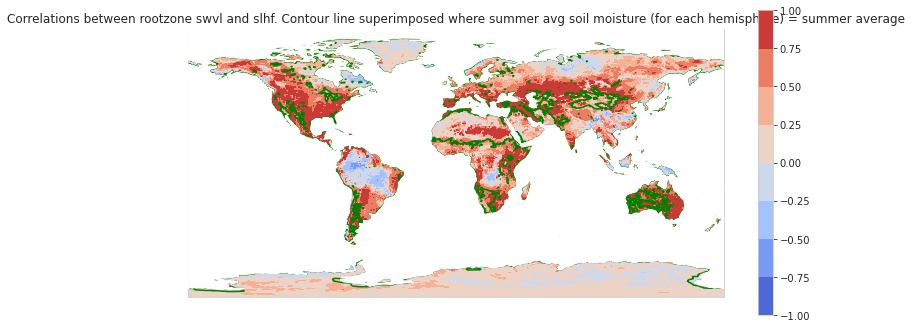

In [ ]:
jja_corr = xr.corr(remove_seasonality(ds.slhf.sel(time=jja(ds.slhf['time.month']))), 
        remove_seasonality(rootzone_swvl.sel(time=jja(rootzone_swvl['time.month']))), dim='time')

djf_corr = xr.corr(remove_seasonality(ds.slhf.sel(time=djf(ds.slhf['time.month']))), 
        remove_seasonality(rootzone_swvl.sel(time=djf(rootzone_swvl['time.month']))), dim='time')

c = xr.concat([jja_corr.where(jja_corr['latitude']>=0, drop=True), 
               djf_corr.where(djf_corr['latitude']<0, drop=True)],
              dim='latitude')

mean_jja_swvl = rootzone_swvl.sel(time=jja(rootzone_swvl['time.month'])).mean(dim='time').where(lambda x: x.latitude>0, drop=True)
mean_djf_swvl = rootzone_swvl.sel(time=djf(rootzone_swvl['time.month'])).mean(dim='time').where(lambda x: x.latitude<0, drop=True)

lats = ds.latitude
longs = ds.longitude

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(longs, lats, c, cmap='coolwarm')
plt.colorbar(shrink=0.7)
ax.coastlines()

plt.contour(longs, lats.where(lambda x: x>0, drop=True), mean_jja_swvl, levels=[138.02909303], colors='green')
plt.contour(longs, lats.where(lambda x: x<0, drop=True), mean_djf_swvl, levels=[138.02909303], colors='green')

# look into correlations over ocean
ax.add_feature(cfeature.OCEAN, zorder=100, color='w')

plt.title("Correlations between rootzone swvl and slhf. Contour line superimposed where summer avg soil moisture (for each hemisphere) = summer average")
plt.savefig("/content/drive/MyDrive/climate-data/figs/rootzone-swvl_slhf__era5.pdf")

In [ ]:
jja_corr = xr.corr(remove_seasonality(ds.slhf.sel(time=jja(ds.t2m['time.month']))), 
        remove_seasonality(ds.swvl1.sel(time=jja(ds.t2m['time.month']))), dim='time')

djf_corr = xr.corr(remove_seasonality(ds.slhf.sel(time=djf(ds.t2m['time.month']))), 
        remove_seasonality(ds.swvl1.sel(time=djf(ds.t2m['time.month']))), dim='time')

c = xr.concat([jja_corr.where(jja_corr['latitude']>=0, drop=True), 
               djf_corr.where(djf_corr['latitude']<0, drop=True)],
              dim='latitude')

c

<xarray.DataArray (latitude: 721, longitude: 1440)>
dask.array<concatenate, shape=(721, 1440), dtype=float64, chunksize=(361, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


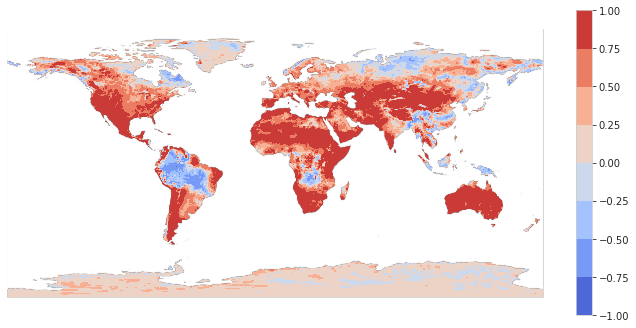

In [ ]:
lats = ds.latitude
longs = ds.longitude

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(longs, lats, c, cmap='coolwarm')
plt.colorbar(shrink=0.7)
ax.coastlines()

# look into correlations over ocean
ax.add_feature(cfeature.OCEAN, zorder=100, color='w')

In [ ]:
# calculate summer swvl1 average in northern hemisphere

jja_swvl1 = ds.swvl1.sel(time=jja(ds.swvl1['time.month'])).where(lambda x: (x>0.001) & (x.latitude>0), drop=True)
weights = np.cos(np.deg2rad(jja_swvl1.latitude))
weighted_jja_swvl1 = jja_swvl1.weighted(weights)
north_mean = weighted_jja_swvl1.mean(skipna=True)
north_mean.values

array(17.536625, dtype=float32)

In [ ]:
# calculate summer swvl1 average in southern hemisphere

djf_swvl1 = ds.swvl1.sel(time=djf(ds.swvl1['time.month'])).where(lambda x: (x>0.001) & (x.latitude<0), drop=True)
weights = np.cos(np.deg2rad(djf_swvl1.latitude))
weighted_djf_swvl1 = djf_swvl1.weighted(weights)
south_mean = weighted_djf_swvl1.mean(skipna=True)
south_mean.values

array(18.617659, dtype=float32)

In [ ]:
summer_swvl1 = xr.concat([ds.swvl1.sel(time=jja(ds.swvl1['time.month'])).where(lambda x: x.latitude>0, drop=True), 
                          ds.swvl1.sel(time=djf(ds.swvl1['time.month'])).where(lambda x: x.latitude<=0, drop=True)], dim='latitude')
summer_swvl1 = summer_swvl1.where(lambda x: x>0.001)
weights = np.cos(np.deg2rad(summer_swvl1.latitude))
weighted_summer_swvl1 = summer_swvl1.weighted(weights)
summer_mean = weighted_summer_swvl1.mean(skipna=True)
summer_mean.values

array(17.90745995)

In [ ]:
mean_jja_swvl1 = ds.swvl1.sel(time=jja(ds.swvl1['time.month'])).mean(dim='time')
mean_djf_swvl1 = ds.swvl1.sel(time=djf(ds.swvl1['time.month'])).mean(dim='time')

In [ ]:
top_swvl = ds.swvl1.where(lambda x: x>0.001, drop=True)
weights = np.cos(np.deg2rad(top_swvl.latitude))
weighted_swvl1 = top_swvl.weighted(weights)
annual_mean = weighted_swvl1.mean()
annual_mean.values

array(17.435389, dtype=float32)

Text(0.5, 1.0, 'ERA5: (JJA SWVL1-DJF SWVL1)/Annual Mean')

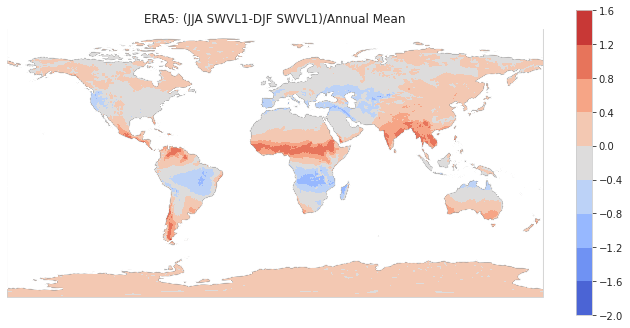

In [ ]:
lats = ds.latitude
longs = ds.longitude
Diff_JJA_DJF = (mean_jja_swvl1-mean_djf_swvl1)/17.435389

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(longs, lats, Diff_JJA_DJF, cmap='coolwarm')
plt.colorbar(shrink=0.7)
ax.coastlines()

# look into correlations over ocean
ax.add_feature(cfeature.OCEAN, zorder=100, color='w')
plt.title("ERA5: (JJA SWVL1-DJF SWVL1)/Annual Mean")

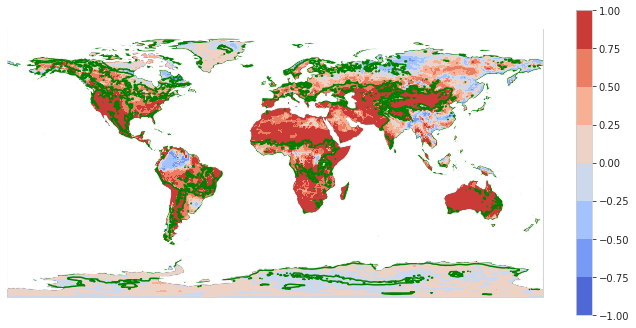

In [ ]:
# JJA plot (i.e. correct for Northern hemisphere)

lats = ds.latitude
longs = ds.longitude

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(longs, lats, jja_corr, cmap='coolwarm')
plt.colorbar(shrink=0.7)
ax.coastlines()

plt.contour(longs, lats, mean_jja_swvl1, levels=[17.536644], colors='green')

# look into correlations over ocean
ax.add_feature(cfeature.OCEAN, zorder=100, color='w')

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


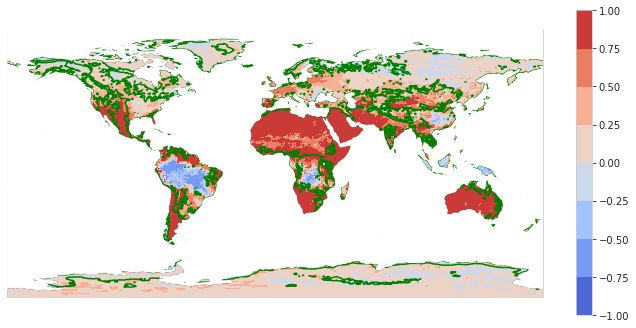

In [ ]:
# DJF plot (i.e. correct for Southern hemisphere)

lats = ds.latitude
longs = ds.longitude

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(longs, lats, djf_corr, cmap='coolwarm')
plt.colorbar(shrink=0.7)
ax.coastlines()

plt.contour(longs, lats, mean_djf_swvl1, levels=[18.617683], colors='green')

# look into correlations over ocean
ax.add_feature(cfeature.OCEAN, zorder=100, color='w')

In [ ]:
mean_jja_swvl1 = mean_jja_swvl1.where(lambda x: x.latitude>0, drop=True)
mean_djf_swvl1 = mean_djf_swvl1.where(lambda x: x.latitude<0, drop=True)

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, 'Correlations between swvl1 and slhf. Contour line superimposed where summer avg soil moisture (for each hemisphere) = hemispheric average')

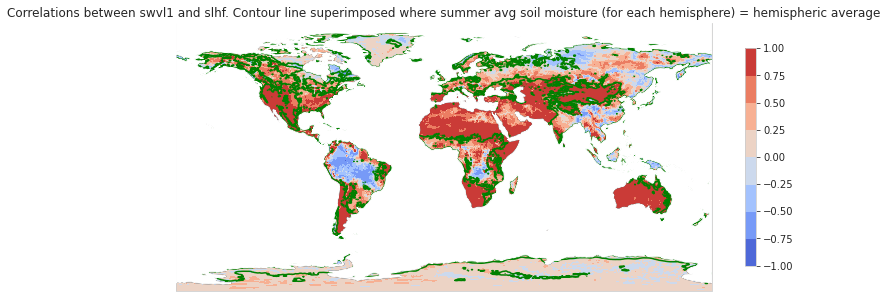

In [ ]:
lats = ds.latitude
longs = ds.longitude

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(longs, lats, c, cmap='coolwarm')
plt.colorbar(shrink=0.5)
ax.coastlines()

plt.contour(longs, lats.where(lambda x: x>0, drop=True), mean_jja_swvl1, levels=[17.536644], colors='green')
plt.contour(longs, lats.where(lambda x: x<0, drop=True), mean_djf_swvl1, levels=[18.617683], colors='green')

# look into correlations over ocean
ax.add_feature(cfeature.OCEAN, zorder=100, color='w')
plt.title("Correlations between swvl1 and slhf. Contour line superimposed where summer avg soil moisture (for each hemisphere) = hemispheric average")

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


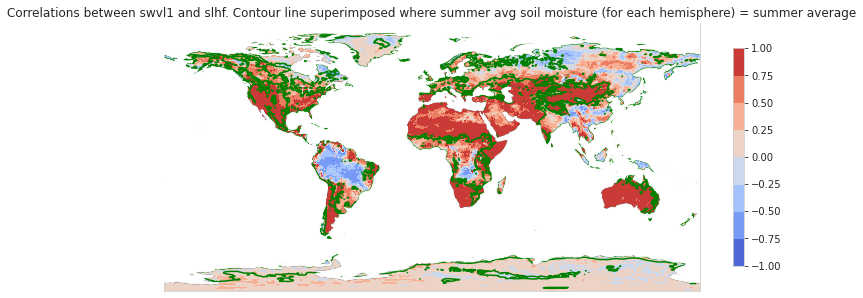

In [ ]:
lats = ds.latitude
longs = ds.longitude

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(longs, lats, c, cmap='coolwarm')
plt.colorbar(shrink=0.5)
ax.coastlines()

plt.contour(longs, lats.where(lambda x: x>0, drop=True), mean_jja_swvl1, levels=[17.90745995], colors='green')
plt.contour(longs, lats.where(lambda x: x<0, drop=True), mean_djf_swvl1, levels=[17.90745995], colors='green')

# look into correlations over ocean
ax.add_feature(cfeature.OCEAN, zorder=100, color='w')
plt.title("Correlations between swvl1 and slhf. Contour line superimposed where summer avg soil moisture (for each hemisphere) = summer average")
plt.savefig("/content/drive/MyDrive/climate-data/figs/vargas_fig-4__era5.pdf")

In [ ]:
jja_corr_2 = xr.corr(remove_seasonality(ds.sshf.sel(time=jja(ds.sshf['time.month']))), 
        remove_seasonality(ds.t2m.sel(time=jja(ds.t2m['time.month']))), dim='time')

djf_corr_2 = xr.corr(remove_seasonality(ds.sshf.sel(time=djf(ds.sshf['time.month']))), 
        remove_seasonality(ds.t2m.sel(time=djf(ds.t2m['time.month']))), dim='time')

c_2 = xr.concat([jja_corr_2.where(jja_corr_2['latitude']>=0, drop=True), 
               djf_corr_2.where(djf_corr_2['latitude']<0, drop=True)],
              dim='latitude')

c_2

<xarray.DataArray (latitude: 721, longitude: 1440)>
dask.array<concatenate, shape=(721, 1440), dtype=float64, chunksize=(361, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    expver     int32 1

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


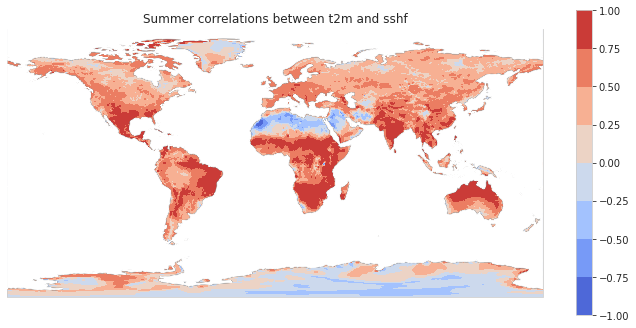

In [ ]:
lats = ds.latitude
longs = ds.longitude

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(longs, lats, c_2, cmap='coolwarm')
plt.colorbar(shrink=0.7)
ax.coastlines()

# look into correlations over ocean
ax.add_feature(cfeature.OCEAN, zorder=100, color='w')
plt.title("Summer correlations between t2m and sshf")
plt.savefig("/content/drive/MyDrive/climate-data/figs/t2m_sshf-corr_era5.pdf")

In [136]:
m_2m

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576, time: 484)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 1980-01-01T00:30:00 ... 2019-12-01T00:30:00
Data variables:
    T2M      (time, lat, lon) float32 dask.array<chunksize=(100, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Fri May  8 00...
    Filename:                          MERRA2_100.tavgM_2d_slv_Nx.198001.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/AP1B0BA5PD2K
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2021-01-29 05:09:09 GMT Hyrax-1.15.1 h...

In [ ]:
def grid_climatology(data,mn=None,mx=None,lvn=10,limits=False,cmap=cmo.thermal,hide_ocean=False,save=False,savetype='pdf'):
    lat = data.latitude
    lon = data.longitude

    fig,axes = plt.subplots(nrows=4, ncols=3,figsize=(14,10),dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    axs=axes.flatten()
    for i in np.arange(0,12):
        avg = data.sel({'time': data['time.month']==i+1}).mean('time') 
        im = axes.flat[i].contourf(lon, lat, avg, levels=np.linspace(mn,mx,lvn+1),cmap=cmap,extend='both')
        axs[i].xaxis.set_visible(False)
        axs[i].yaxis.set_visible(False)
        axs[i].coastlines()
        axs[i].set_title('Month: '+ str(i+1),fontsize=15)
        if(hide_ocean):
            axs[i].add_feature(cfeature.OCEAN, zorder=100, edgecolor='k')
    
    fig.colorbar(im, ax=axes.ravel().tolist(),cax=fig.add_axes([0.92,0.1,.03,.8]))
    plt.subplots_adjust()
    plt.suptitle('ERA 5: {}, Units:{}'.format(data.attrs['long_name'], data.attrs['units']), fontsize=18)
    if(save):
        plt.savefig('figs/gr_' + data.attrs['long_name'] +
                    '_monthly.' + str(savetype))
    plt.show()

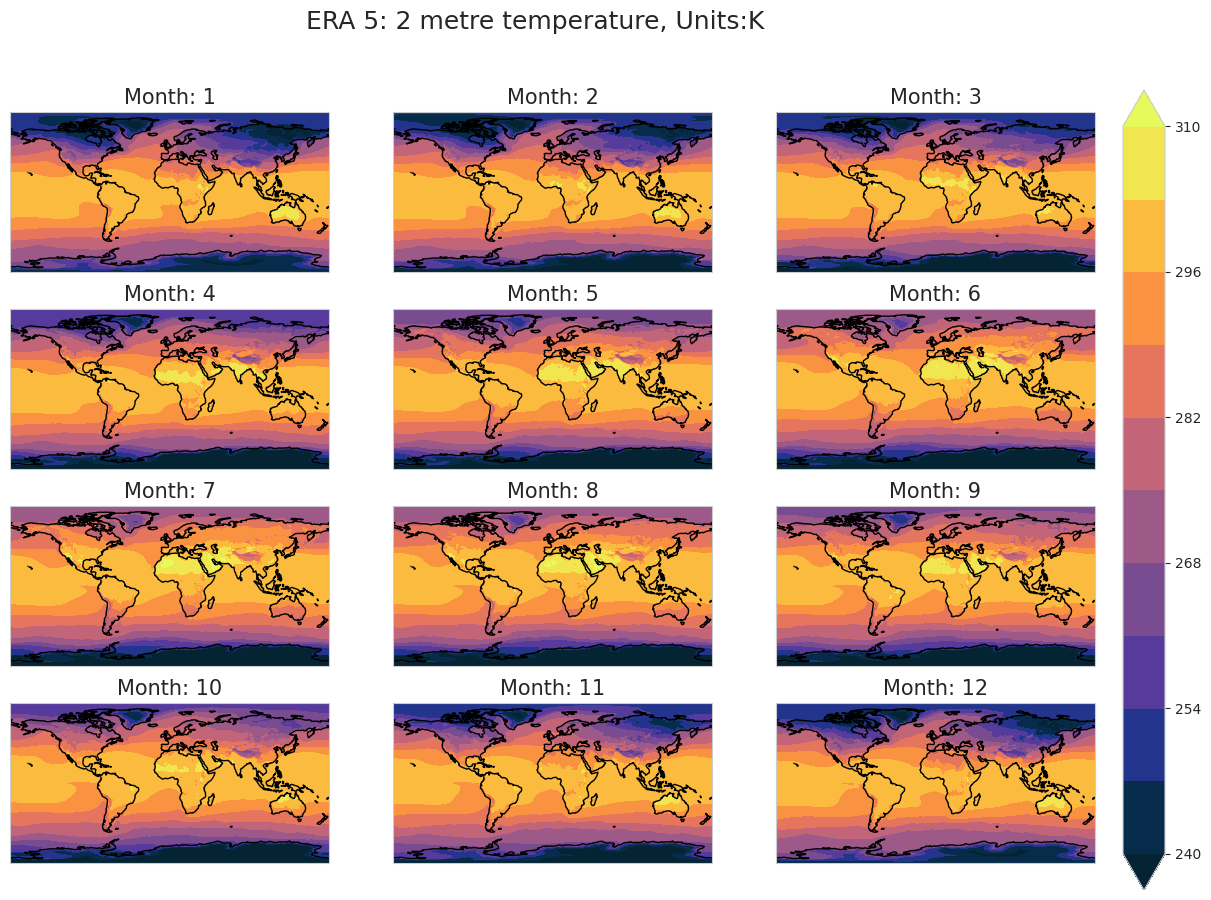

In [ ]:
grid_climatology(ds.t2m, 240, 310, limits=True)

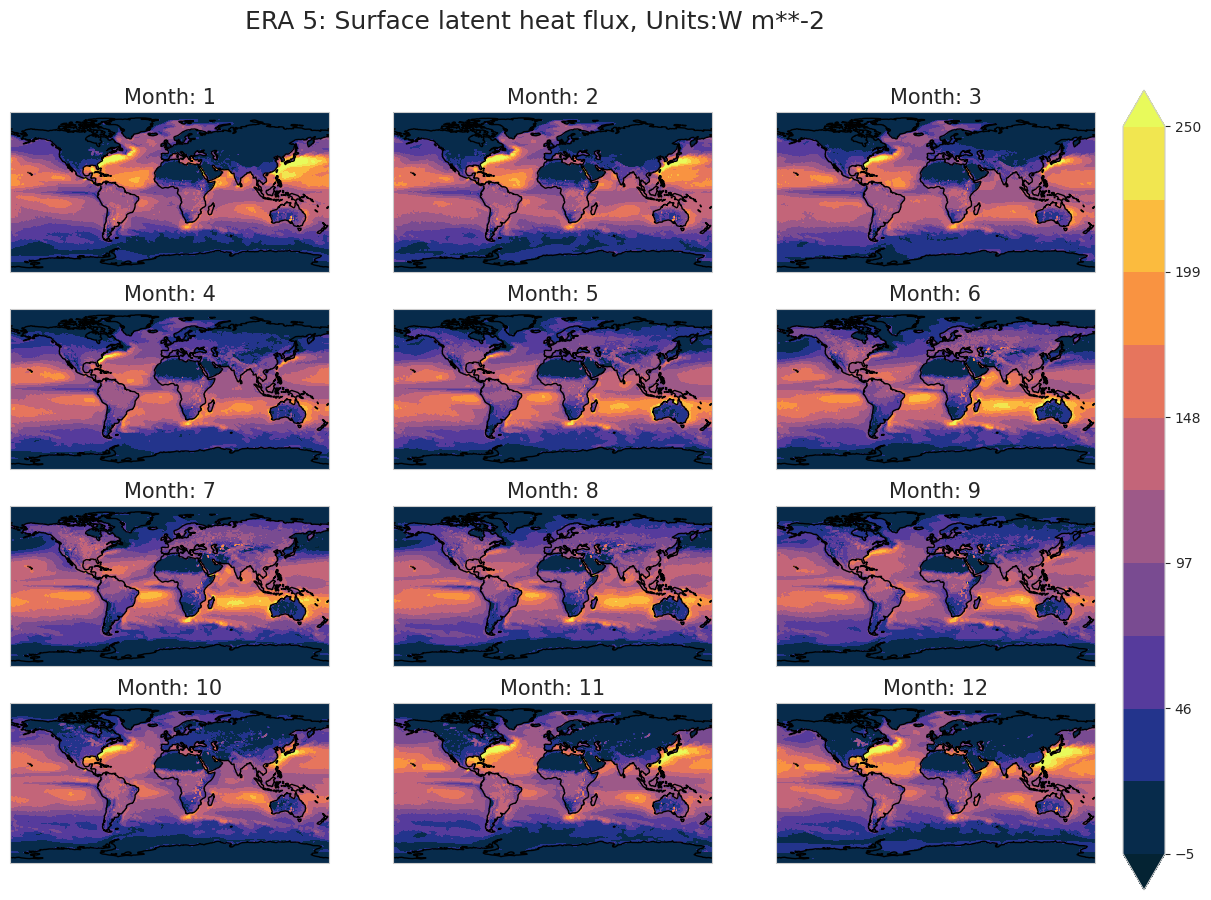

In [ ]:
grid_climatology(ds.slhf, -5, 250, limits=True)

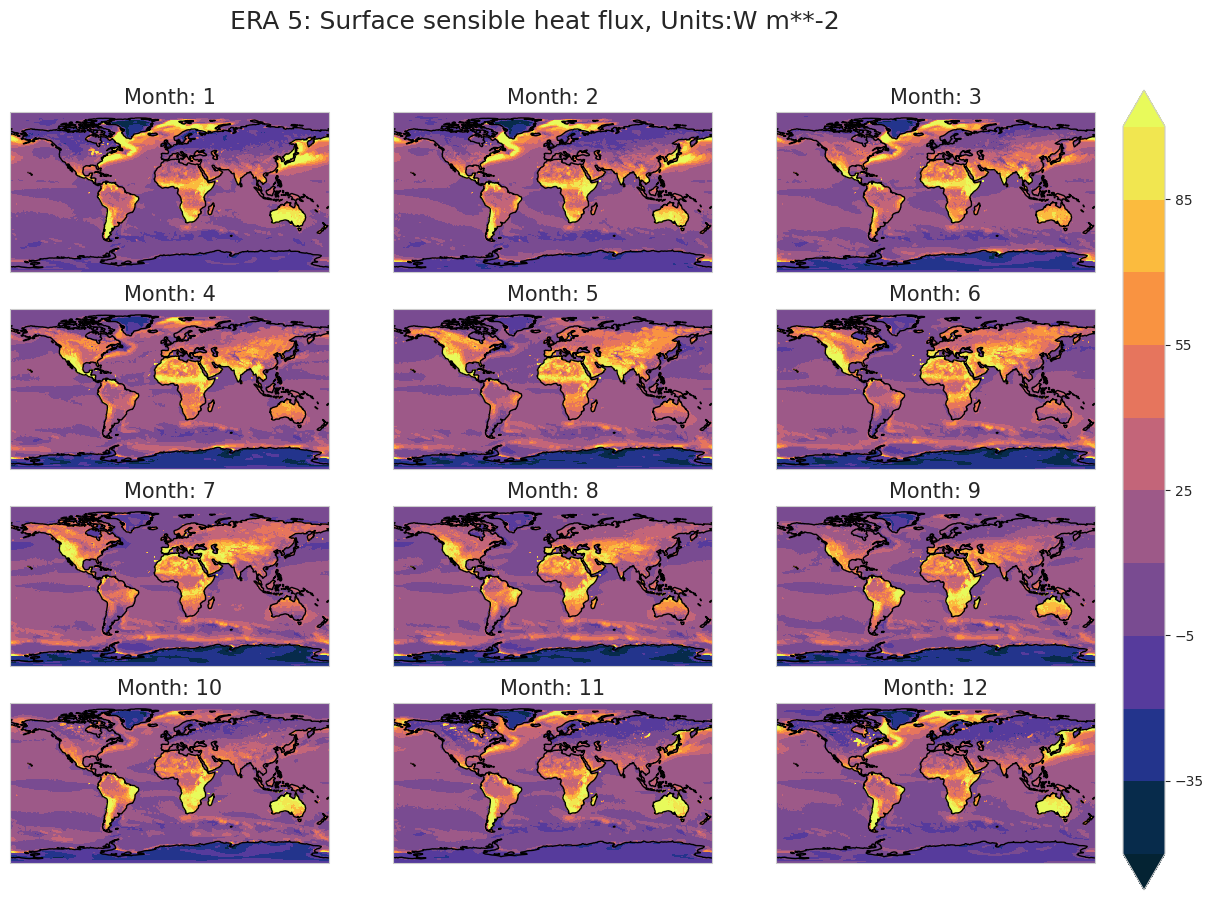

In [ ]:
grid_climatology(ds.sshf, -50, 100, limits=True)

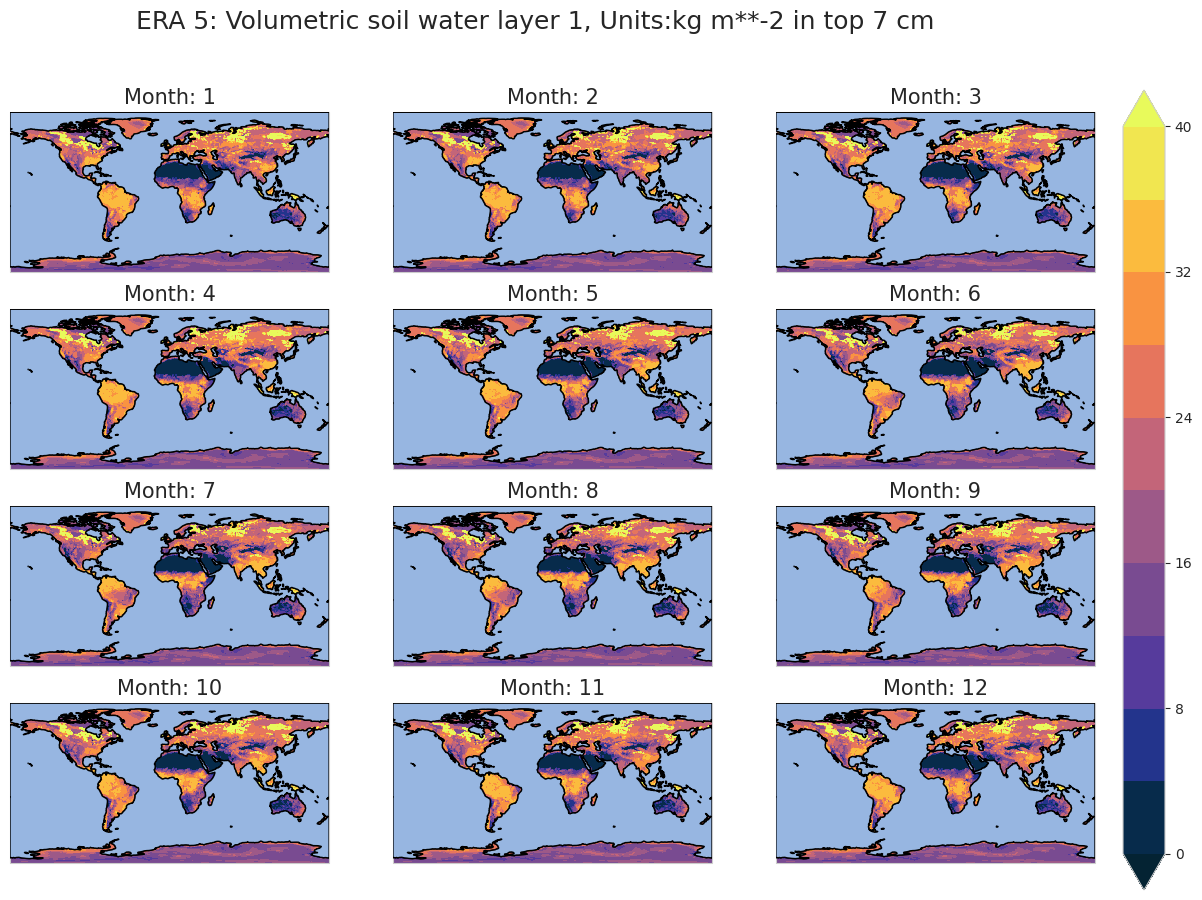

In [ ]:
grid_climatology(ds.swvl1, 0, 40, limits=True, hide_ocean=True)

In [11]:
def plot_climatology(x, show_ocean=True, limits=False, lmin=None, lmax=None, cmap=cmo.thermal, pre_title=""):
    avg = x.mean('time')
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    
    if(limits):
        avg.plot(ax=ax, vmin=lmin, vmax=lmax, cbar_kwargs={'shrink':0.5}, cmap=cmap, levels=np.linspace(lmin,lmax,11))
    else:
        avg.plot(ax=ax, vmin=lmin, vmax=lmax, cbar_kwargs={'shrink':0.5}, cmap=cmap)
    
    if show_ocean == False:
        ax.add_feature(cfeature.OCEAN, zorder=100, color='w')
        
    plt.title("{} Climatology of {}, Units: {}".format(pre_title, x.attrs['long_name'], x.attrs['units']))

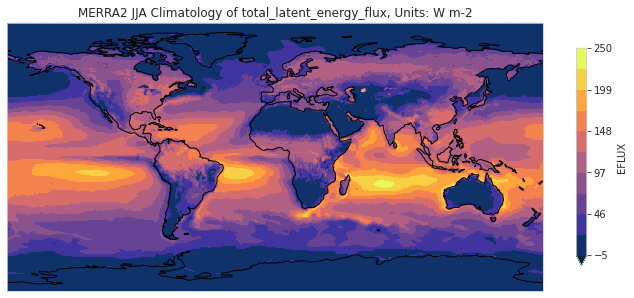

In [15]:
plot_climatology(m_flux['EFLUX'].sel(time=jja(m_flux.EFLUX['time.month'])), limits=True, lmin=-5, lmax=250, pre_title="MERRA2 JJA")

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


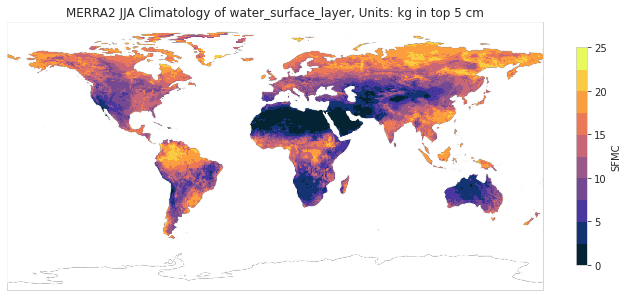

In [20]:
plot_climatology(m_sfmc['SFMC'].sel(time=jja(m_sfmc['time.month'])), show_ocean=False, limits=True, lmin=0, lmax=25, pre_title="MERRA2 JJA")

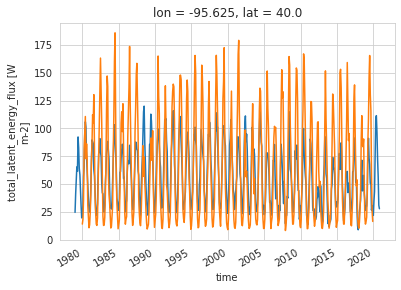

In [25]:
ds['slhf'].sel(latitude=40.24, longitude=-95.59, method='nearest').plot()
m_flux['EFLUX'].sel(lat=40.24, lon=-95.59, method='nearest').plot()

In [26]:
ds['slhf'].sel(latitude=40.24, longitude=-95.59, method='nearest').mean().values

array(56.399117, dtype=float32)

In [28]:
m_flux['EFLUX'].sel(lat=40.24, lon=-95.59, method='nearest').mean().values

array(63.82108, dtype=float32)

In [36]:
era_swvl1 = ds['swvl1'].sel(latitude=40.24, longitude=-95.59, method='nearest').groupby("time.year").mean()
era_lflux = ds['slhf'].sel(latitude=40.24, longitude=-95.59, method='nearest').groupby("time.year").mean()

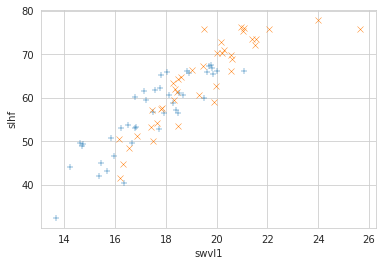

In [51]:
sns.scatterplot(x=era_swvl1, y=era_lflux, marker='+')
sns.scatterplot(x=merra_swvl1, y=merra_lflux, marker='x')

In [49]:
merra_sfmc = m_sfmc['SFMC'].sel(lat=40.24, lon=-95.59, method='nearest').groupby("time.year").mean().sel(year=slice("1980", "2019"))
merra_lflux = m_flux['EFLUX'].sel(lat=40.24, lon=-95.59, method='nearest').groupby("time.year").mean()

In [50]:
merra_swvl1 = merra_sfmc.sel(year=slice("1980", "2019"))*(7/5)

In [44]:
merra_lflux

<xarray.DataArray 'EFLUX' (year: 40)>
dask.array<stack, shape=(40,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 -95.62
    lat      float64 40.0
  * year     (year) int64 1980 1981 1982 1983 1984 ... 2015 2016 2017 2018 2019

In [103]:
def scatter(era_x, era_y, merra_x, merra_y, lat, lon, post_title=""):
  era_x = era_x.rename({"latitude":"lat", "longitude":"lon"})
  era_y = era_y.rename({"latitude":"lat", "longitude":"lon"})

  era_x = era_x.assign_coords(lon=(((era_x.lon + 180) % 360) - 180))
  era_x = era_x.sortby('lon')
  era_x = era_x.reindex(lat=merra_x.lat, lon=merra_x.lon,method='nearest')
  
  era_y = era_y.assign_coords(lon=(((era_y.lon + 180) % 360) - 180))
  era_y = era_y.sortby('lon')
  era_y = era_y.reindex(lat=merra_y.lat, lon=merra_y.lon,method='nearest')

  era_x_means = era_x.sel(lat=lat, lon=lon, method='nearest').groupby("time.year").mean()
  era_y_means = era_y.sel(lat=lat, lon=lon, method='nearest').groupby("time.year").mean()
  
  merra_x_means = merra_x.sel(lat=lat, lon=lon, method='nearest').groupby("time.year").mean()
  merra_y_means = merra_y.sel(lat=lat, lon=lon, method='nearest').groupby("time.year").mean()

  sns.scatterplot(x=era_x_means, y=era_y_means, marker='+')
  sns.scatterplot(x=merra_x_means, y=merra_y_means, marker='x')

  plt.title("ERA5(+) {}, {} compared with \n MERRA2(x) {}, {} at \n {}, {} i.e. {}".format(era_x.attrs['long_name'], era_y.attrs['long_name'],
                                                                         merra_x.attrs['long_name'], merra_y.attrs['long_name'], lat, lon, post_title))

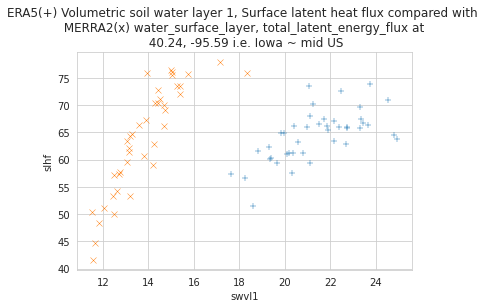

In [104]:
scatter(ds['swvl1'], ds['slhf'], m_sfmc['SFMC'].sel(time=slice("1980", "2019")), m_flux['EFLUX'], 40.24, -95.59, "Iowa ~ mid US")

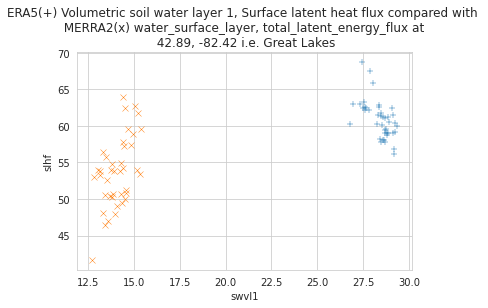

In [105]:
scatter(ds['swvl1'], ds['slhf'], m_sfmc['SFMC'].sel(time=slice("1980", "2019")), m_flux['EFLUX'], 42.89, -82.42, "Great Lakes")

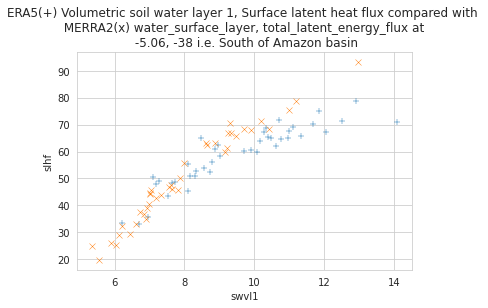

In [106]:
scatter(ds['swvl1'], ds['slhf'], m_sfmc['SFMC'].sel(time=slice("1980", "2019")), m_flux['EFLUX'], -5.06, -38, "South of Amazon basin")

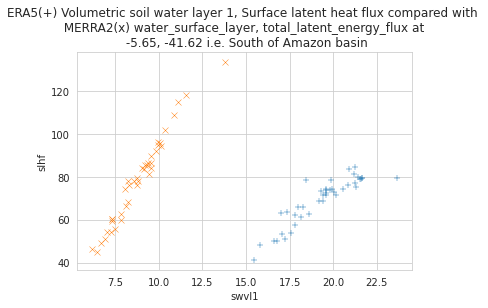

In [108]:
scatter(ds['swvl1'], ds['slhf'], m_sfmc['SFMC'].sel(time=slice("1980", "2019")), m_flux['EFLUX'], -5.65, -41.62, "South of Amazon basin")

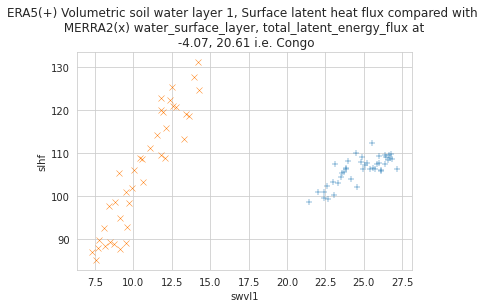

In [109]:
scatter(ds['swvl1'], ds['slhf'], m_sfmc['SFMC'].sel(time=slice("1980", "2019")), m_flux['EFLUX'], -4.07, 20.61, "Congo")

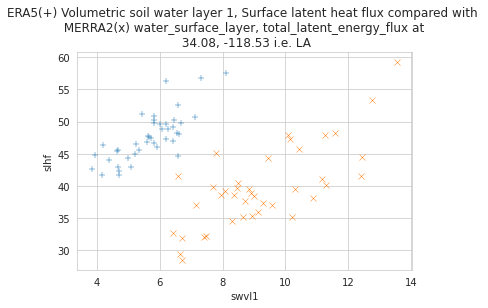

In [110]:
scatter(ds['swvl1'], ds['slhf'], m_sfmc['SFMC'].sel(time=slice("1980", "2019")), m_flux['EFLUX'], 34.08, -118.53, "LA")

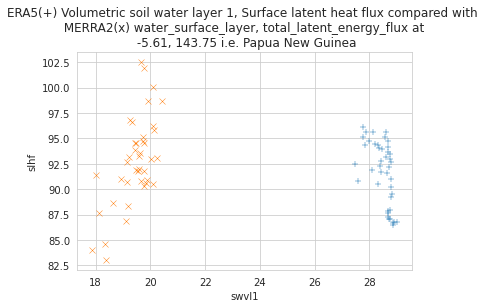

In [111]:
scatter(ds['swvl1'], ds['slhf'], m_sfmc['SFMC'].sel(time=slice("1980", "2019")), m_flux['EFLUX'], -5.61, 143.75, "Papua New Guinea")

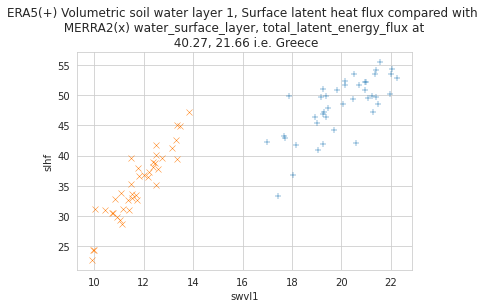

In [112]:
scatter(ds['swvl1'], ds['slhf'], m_sfmc['SFMC'].sel(time=slice("1980", "2019")), m_flux['EFLUX'], 40.27, 21.66, "Greece")

In [81]:
def diff_Plot(x,y,mn=0,mx=0,lvn=10,limits=False,show_ocean = True, cmap='coolwarm',season='JJA',save=False):
   
    x_var = remove_seasonality(x).var('time')
    x_var = x_var.assign_coords(lon=(((x_var.lon + 180) % 360) - 180))
    x_var = x_var.sortby('lon')
    x_var = x_var.reindex(lat=y.lat, lon=y.lon,method='nearest')
   
    y_var = remove_seasonality(y).var('time')
    diff = y_var - x_var
    lon = y.lon
    lat = y.lat

    fig = plt.figure(figsize=(12,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    if(limits):
        mn=-mx
        plt.contourf(lon,lat,diff,levels=np.linspace(mn,mx,lvn),cmap=cmap,extend='both')
    else:
        plt.contourf(lon, lat, diff, cmap=cmap)

    if show_ocean == False:
        ax.add_feature(cfeature.OCEAN, zorder=100, color='w')

    plt.colorbar(shrink=0.5)

    plt.title(season + " Difference in Variance of {} (ERA5) and {} (Merra2)".format(x.attrs['long_name'],y.attrs['long_name'])  +
             "\nRed areas = more variance in Merra 2 \n"+
             "Blue areas = more variance in Era5")
    if(save):
        plt.savefig('/Users/averyrobinson/Desktop/rsrch/plots/'+ season + "_diffVar_HFLUX_sshf.png", bbox_inches='tight')


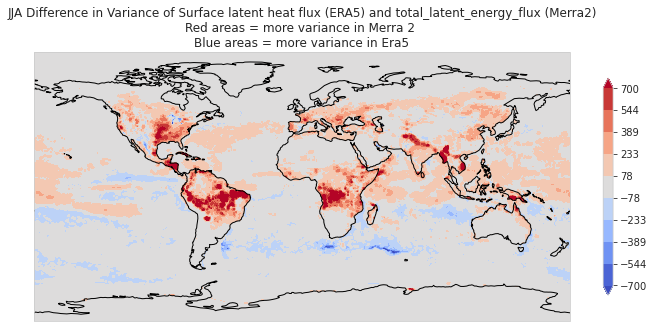

In [83]:
diff_Plot(ds['slhf'].sel(time=jja(ds.slhf['time.month'])).rename({"latitude":"lat", "longitude":"lon"}), m_flux['EFLUX'].sel(time=jja(m_flux.EFLUX['time.month'])), 
          mn=-700, mx=700, limits=True)

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


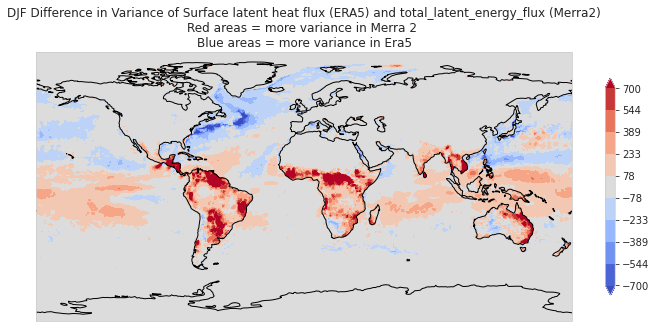

In [84]:
diff_Plot(ds['slhf'].sel(time=djf(ds.slhf['time.month'])).rename({"latitude":"lat", "longitude":"lon"}), m_flux['EFLUX'].sel(time=djf(m_flux.EFLUX['time.month'])), 
          mn=-700, mx=700, limits=True, season="DJF")

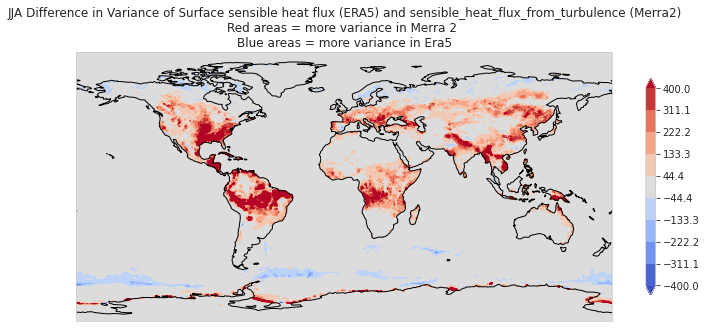

In [88]:
diff_Plot(ds['sshf'].sel(time=jja(ds.sshf['time.month'])).rename({"latitude":"lat", "longitude":"lon"}), m_flux['HFLUX'].sel(time=jja(m_flux.HFLUX['time.month'])), 
          mn=-400, mx=400, limits=True)

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


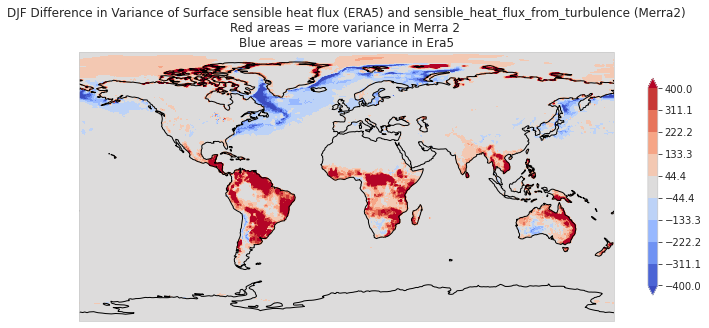

In [126]:
diff_Plot(ds['sshf'].sel(time=djf(ds.sshf['time.month'])).rename({"latitude":"lat", "longitude":"lon"}), m_flux['HFLUX'].sel(time=djf(m_flux.HFLUX['time.month'])), 
          mn=-400, mx=400, limits=True, season="DJF")

In [133]:
m_swvl1 = m_sfmc*(7/5)
m_swvl1['SFMC'].attrs['long_name'] = "Estimated Soil water in top 7 cm"
m_swvl1

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576, time: 488)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 1980-01-01T00:30:00 ... 2020-08-01T00:30:00
Data variables:
    SFMC     (time, lat, lon) float32 dask.array<chunksize=(100, 361, 576), meta=np.ndarray>

In [132]:
ds['swvl1'].attrs['long_name']

'Volumetric soil water layer 1'

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


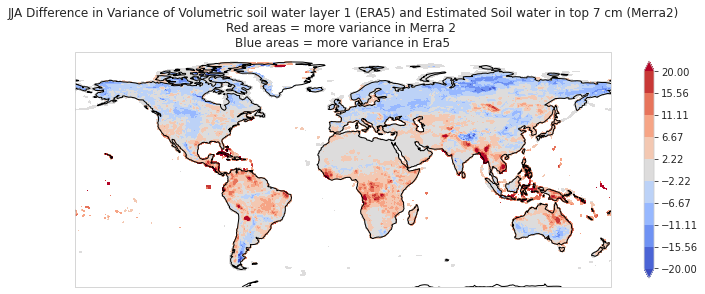

In [135]:
diff_Plot(ds['swvl1'].sel(time=jja(ds.swvl1['time.month'])).rename({"latitude":"lat", "longitude":"lon"}), m_swvl1['SFMC'].sel(time=jja(m_swvl1.SFMC['time.month'])), 
          mn=-20, mx=20, limits=True, season="JJA")

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


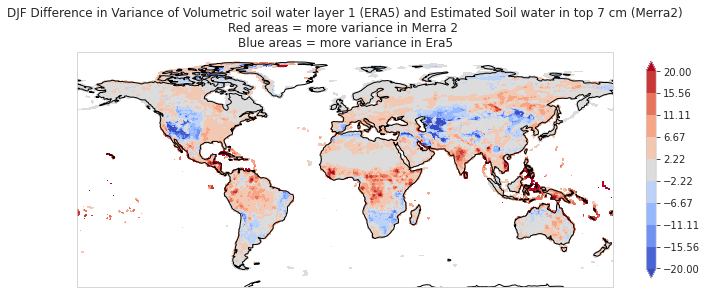

In [134]:
diff_Plot(ds['swvl1'].sel(time=djf(ds.swvl1['time.month'])).rename({"latitude":"lat", "longitude":"lon"}), m_swvl1['SFMC'].sel(time=djf(m_swvl1.SFMC['time.month'])), 
          mn=-20, mx=20, limits=True, season="DJF")

In [121]:
def scatter(ds,lat=0,lon=0, post_title=""):
    temp = ds.sel({'lat':lat,'lon':lon},method='nearest').groupby('time.year').mean('time')
    xr.plot.scatter(temp,'swvl1','slhf',hue='year')
    plt.title("ERA5 Annual averaged swvl1 and slhf values 1979-2020 \n"+
             "Latitude:"+ str(lat) + " Longitude:"+ str(lon) + ", " + post_title)

In [122]:
era = ds.rename({"latitude":"lat", "longitude":"lon"})

era = era.assign_coords(lon=(((era.lon + 180) % 360) - 180))
era = era.sortby('lon')
era = era.reindex(lat=m_2m.lat, lon=m_2m.lon,method='nearest')

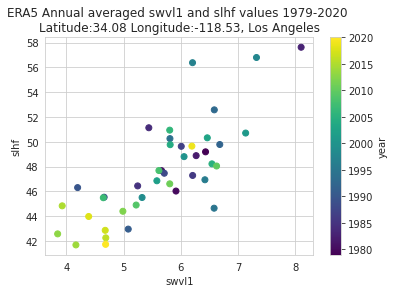

In [123]:
scatter(era, 34.08, -118.53, "Los Angeles")

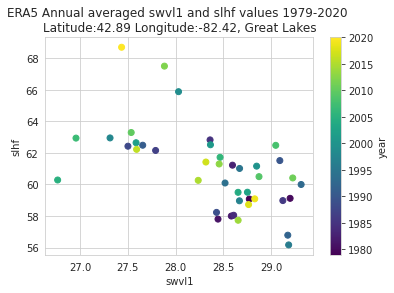

In [124]:
scatter(era, 42.89, -82.42, "Great Lakes")

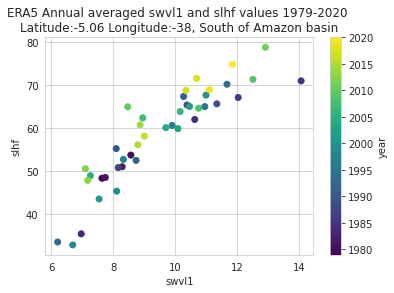

In [125]:
scatter(era, -5.06, -38, "South of Amazon basin")